In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data',"100_syntheticMRI-3d")
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 8

In [2]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            



In [3]:
def filter_func(x):
    x_copy = x.copy().astype(float)
    filtered = ndimage.uniform_filter(x, size = 3)
    #filtered = ndimage.median_filter(x.astype("float"), size = 7)
    x_copy[np.isclose(filtered, 0)] = np.nan
    #x_copy[filtered <= 0.05] = np.nan
    return x_copy

# Gray

In [4]:
gray_wv = convert_to_wavelet_basis_3d(data_dir, image_func= filter_func, debug = True)
gray_wv["data"] = gray_wv["data"].apply(lambda x: x[~np.isnan(x)])
gray_wv.head(10)

8 layers being used


100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


,layer,frequency,orientation,data
0,1,0.996109,L1,[]
1,2,0.498054,aad,[]
2,2,0.498054,ada,[]
3,2,0.498054,add,[]
4,2,0.498054,daa,[]
5,2,0.498054,dad,[]
6,2,0.498054,dda,[]
7,2,0.498054,ddd,[]
8,3,0.332036,aad,"[-1178617.707031251, -180064.888671875, -10603..."
9,3,0.332036,ada,"[-163132.13281250038, -128205.81445312491, -28..."


In [5]:
gray_wv["data_size"] = gray_wv["data"].apply(lambda x: len(x))
gray_wv

,layer,frequency,orientation,data,data_size
0,1,0.996109,L1,[],0
1,2,0.498054,aad,[],0
2,2,0.498054,ada,[],0
3,2,0.498054,add,[],0
4,2,0.498054,daa,[],0
5,2,0.498054,dad,[],0
6,2,0.498054,dda,[],0
7,2,0.498054,ddd,[],0
8,3,0.332036,aad,"[-1178617.707031251, -180064.888671875, -10603...",159
9,3,0.332036,ada,"[-163132.13281250038, -128205.81445312491, -28...",159


In [6]:
gray_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    gray_df = pd.concat([gray_df, ks_df], axis = 0)
gray_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_50022/4190067360.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_50022/4190067360.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_50022/4190067360.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_50022/4190067360.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See docum

,Layer,First,Second,KS_Stat,Pvalue
0,2,aad,ada,NaN,NaN
1,2,aad,add,NaN,NaN
2,2,aad,daa,NaN,NaN
3,2,aad,dad,NaN,NaN
4,2,aad,dda,NaN,NaN
...,...,...,...,...,...
3,7,aad,dad,0.174957,0.0
4,7,aad,dda,0.176120,0.0
10,7,ada,ddd,0.209262,0.0
17,7,daa,ddd,0.224895,0.0


/Users/brandonmarks/opt/anaconda3/envs/HBMV/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


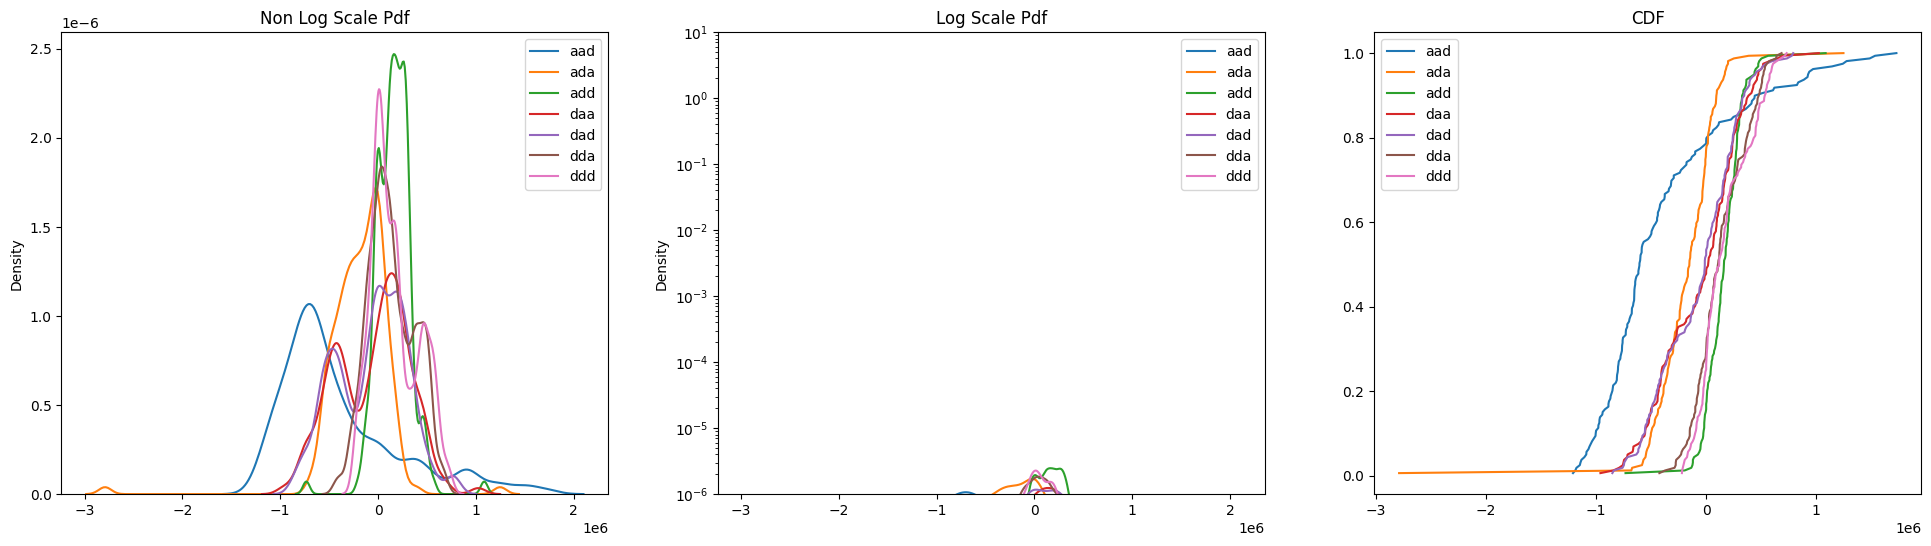

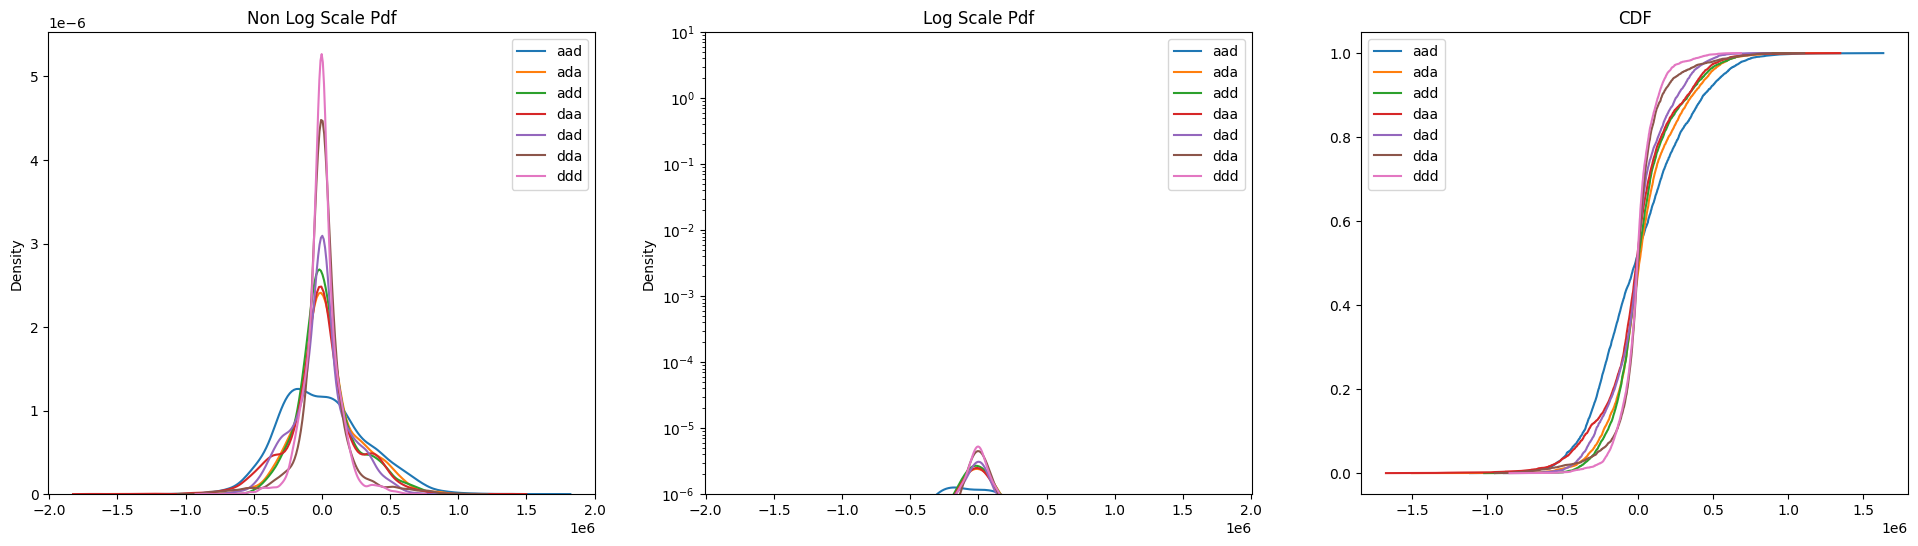

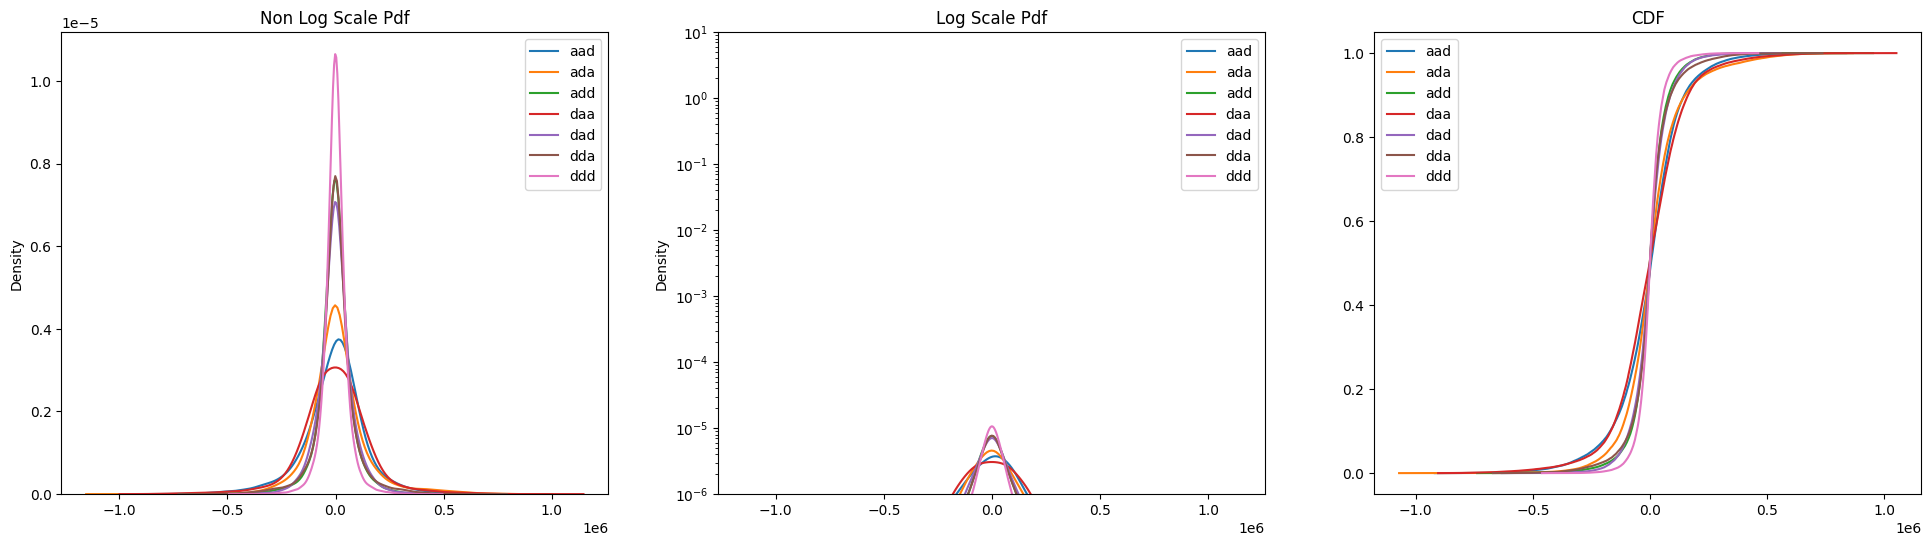

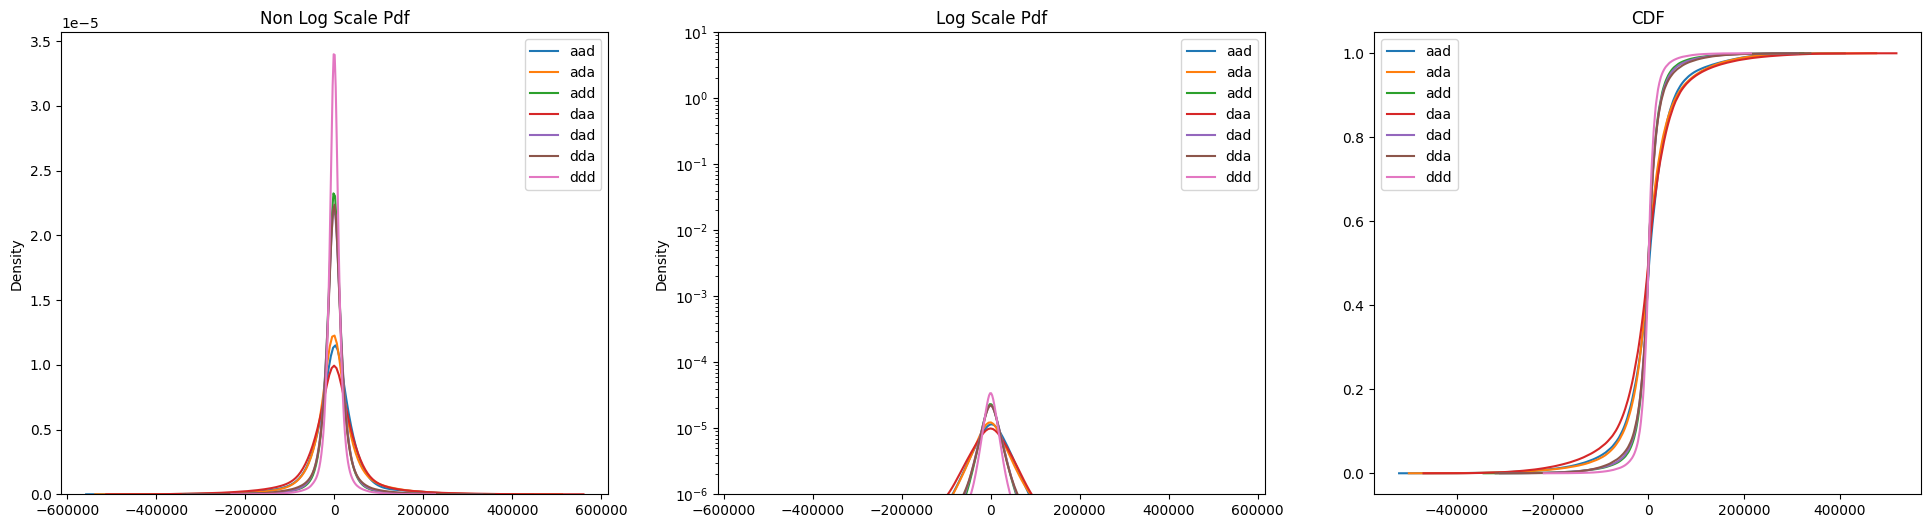

/Users/brandonmarks/opt/anaconda3/envs/HBMV/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


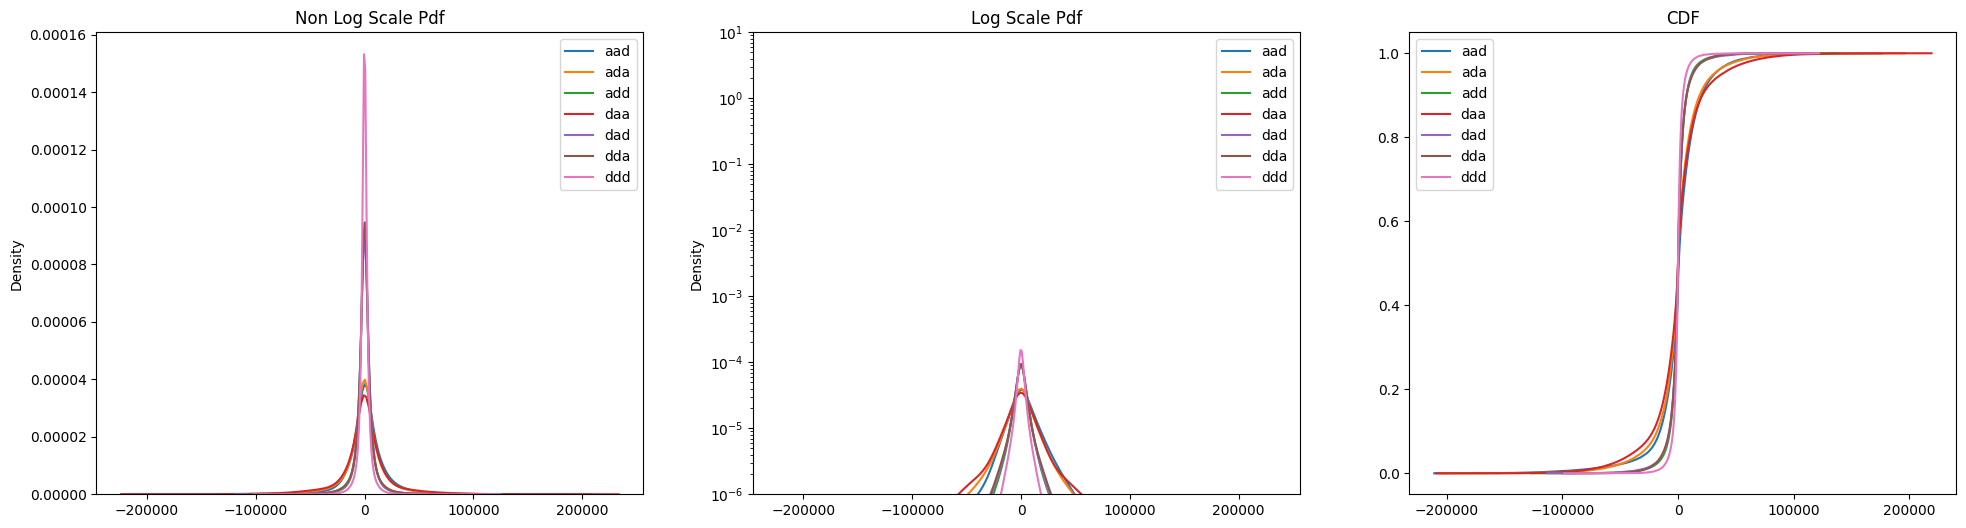

In [7]:
for i in range(3, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)